# Домашнее задание.
# Корнеев А. В. БПМ-152

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
buf = plt.imread('221059.png')

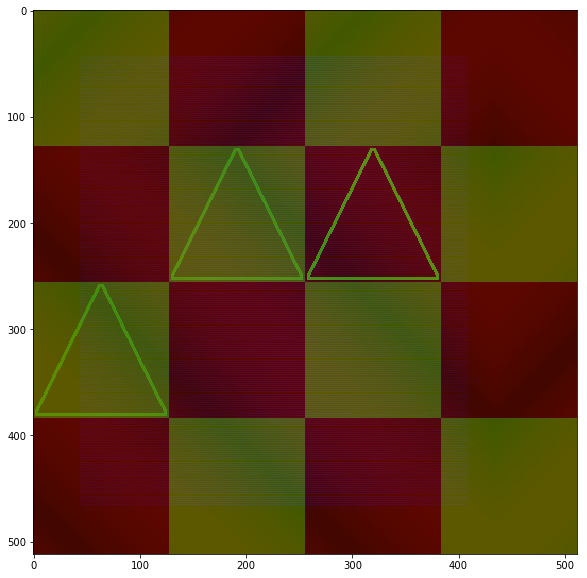

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(buf[:,:,0:3])

# Задание 1. 
Найти уравнение окружности по трем точкам, расположенным в слое A. Изобразить окружность на
графике вместе с тремя точкам, по которым она построена.

In [10]:
bufA = buf[:,:,3]

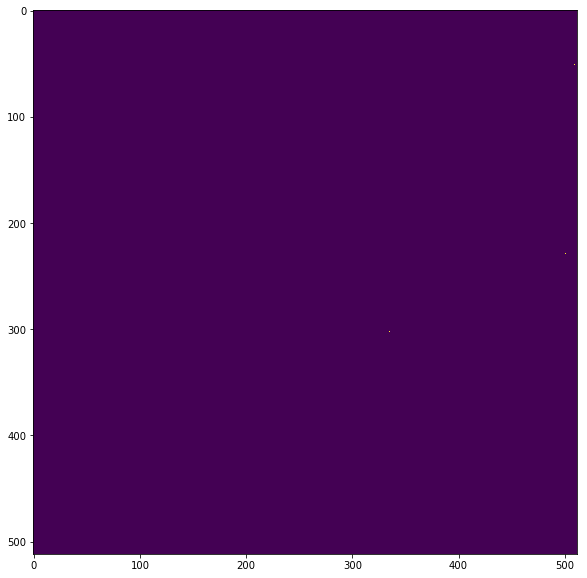

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(bufA)

In [30]:
temp1 = np.array(np.where(bufA!=0))

In [62]:
print('x: ',temp1[1])
print('y: ',511-temp1[0])

x:  [509 501 335]
y:  [460 282 209]


In [38]:
def rescale(inp_arr,arrmin,arrmax,a,b):
    arr = inp_arr.copy()
    arr = (arr - arrmin)*((b-a)/(arrmax - arrmin)) + a
    return arr

In [41]:
from math import pi

In [84]:
X = rescale(temp1[1],0,511,0,2*pi)
Y = rescale(511-temp1[0],0,511,0,2*pi)

In [85]:
print('x: ',X)
print('y: ',Y)

x:  [ 6.25859358  6.16022669  4.11911366]
y:  [ 5.65609636  3.46743299  2.56983509]


In [86]:
from itertools import zip_longest

In [87]:
coords = np.array([x for x in zip_longest(X,Y)])

In [88]:
coords

array([[ 6.25859358,  5.65609636],
       [ 6.16022669,  3.46743299],
       [ 4.11911366,  2.56983509]])

## Для получения уравнения окружности по трем точкам нужно решить систему
    (6.25859358 - h)^2 + ( 5.65609636 - k)^2 == r^2
    (6.16022669 - h)^2 + (3.46743299 - k)^2 == r^2
    (4.11911366 - h)^2 + (2.56983509 - k)^2 == r^2
## относительно h, k, r

## Решение системы:
    h = 4.425812710373778
    k = 4.641926354533432
    r = 2.094666206357455

In [89]:
h = 4.425812710373778
k = 4.641926354533432
r = 2.094666206357455

## Уравнение окружности:
(x - h)^2 + (y - k)^2 == r^2

(0, 6.283185307179586)

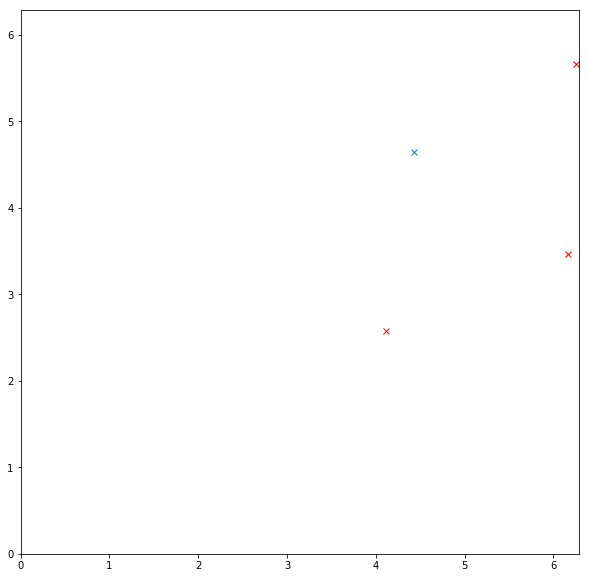

In [101]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.xlim((0,2*pi))
plt.ylim((0,2*pi))

In [97]:
h+r

6.520478916731233

In [107]:
xs = np.linspace(-r,r,500)
ys_p = np.sqrt(r**2-xs**2)
ys_m = -np.sqrt(r**2-xs**2)

In [108]:
xs += h
ys_p += k
ys_m += k

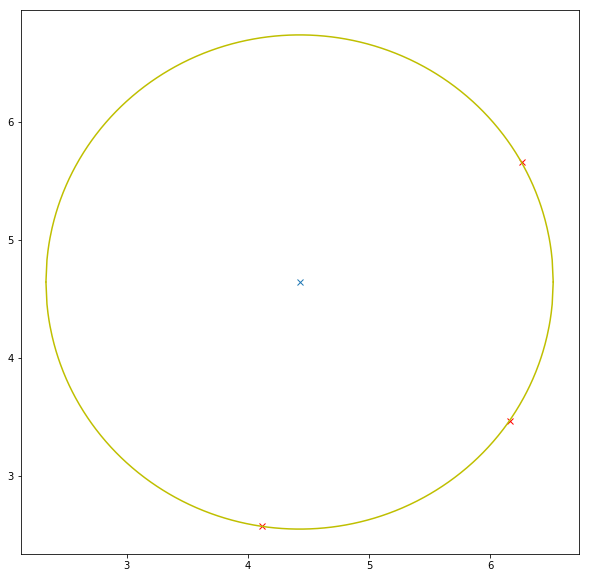

In [111]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.plot(xs,ys_p,'y')
plt.plot(xs,ys_m,'y')

(0, 6.283185307179586)

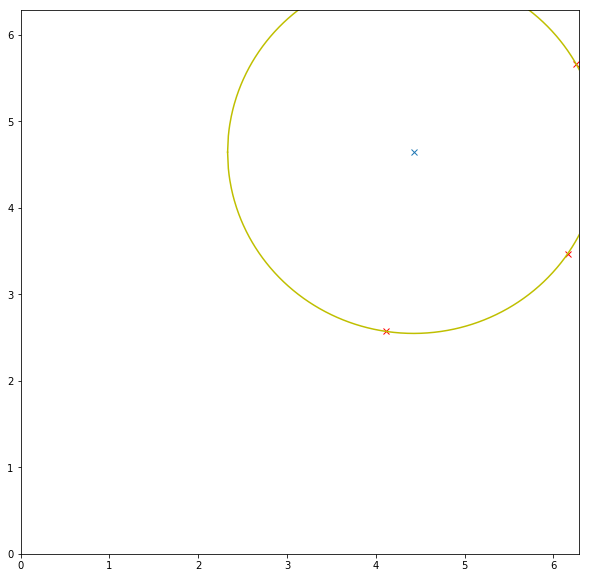

In [112]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.plot(xs,ys_p,'y')
plt.plot(xs,ys_m,'y')
plt.xlim((0,2*pi))
plt.ylim((0,2*pi))

# Задание 2. 
Рассчитать длину той части (частей) окружности, которая умещается в пределах слоя, т.е. в квадрате
[0..2𝜋] x [0..2𝜋].

In [127]:
mask_p = np.array(xs<=2*pi ) * np.array(ys_p<=2*pi)
mask_m = np.array(xs<=2*pi ) * np.array(ys_m<=2*pi)

In [192]:
y1 = ys_p[np.argwhere(ys_p>2*pi)[0]] [0]
x1 = xs[np.argwhere(ys_p>2*pi)[0]] [0]
y2 = ys_p[np.argwhere(ys_p>2*pi)[-1]] [0]
x2 = xs[np.argwhere(ys_p>2*pi)[-1]] [0]

# Замечание: из длины нужно вычесть длинe прямjq, концы которjq обозначены черными крестами 

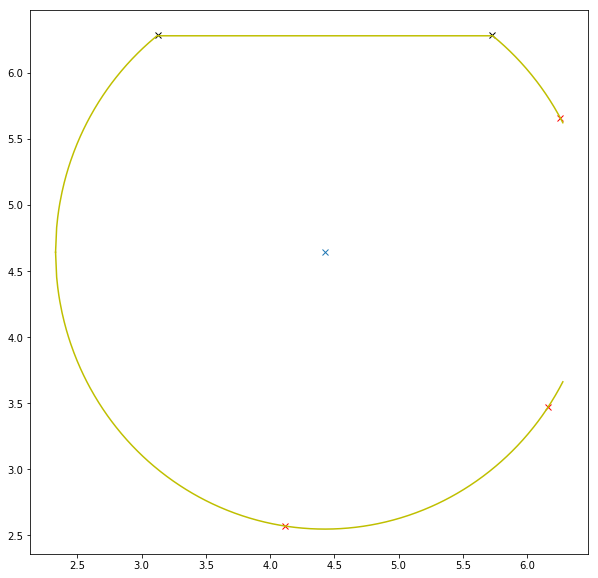

In [212]:
plt.figure(figsize=(10,10))
plt.plot([h],[k],marker='x')
plt.plot([x1],[y1],'k',marker='x')
plt.plot([x2],[y2],'k',marker='x')
plt.plot(X,Y,'_r',marker='x')
plt.plot(xn_p,yn_p,'y')
plt.plot(xn_m,yn_m,'y')

In [128]:
xn_p = xs[mask_p]
yn_p = ys_p[mask_p]
xn_m = xs[mask_m]
yn_m = ys_m[mask_m]

In [172]:
mat1 = np.dstack((xn_p,yn_p))[0][1:]- np.dstack((xn_p,yn_p))[0][:-1]

In [173]:
mat2 = np.dstack((xn_m,yn_m))[0][1:]- np.dstack((xn_m,yn_m))[0][:-1]

In [213]:
temp_len = np.linalg.norm(mat1,axis=1).sum() + np.linalg.norm(mat2,axis=1).sum()

In [209]:
veca = (x2-x1,y2-y1)
vecb = (x4-x3,y4-y3)

In [214]:
fin_len = temp_len - np.linalg.norm(veca)

In [215]:
fin_len

8.3188938762740321

## Выполним проверку
аналитическая длина окружности:


In [208]:
2*pi*r

13.161175931230764

In [176]:
mat3 = np.dstack((xs,ys_p))[0][1:]- np.dstack((xs,ys_p))[0][:-1]
mat4 = np.dstack((xs,ys_m))[0][1:]- np.dstack((xs,ys_m))[0][:-1]

длина окружности построенной по точкам

In [177]:
np.linalg.norm(mat3,axis=1).sum() + np.linalg.norm(mat4,axis=1).sum()

13.160863371342126

### Найдем аналитические длины дуг, которые не попали в квдрат [0,2pi]x[0,2pi]

In [196]:
vec1 = (x1-h,y1-k)
vec2 = (x2-h,y2-k)

In [202]:
vec3 = (x3-h,y3-k)
vec4 = (x4-h,y4-k)

In [203]:
mv1 = np.linalg.norm(vec1)
mv2 = np.linalg.norm(vec2)
mv3 = np.linalg.norm(vec3)
mv4 = np.linalg.norm(vec4)

In [204]:
ang1 = np.dot(vec1,vec2)/(mv1*mv2)

In [205]:
ang2 = np.dot(vec3,vec4)/(mv3*mv4)

In [206]:
2*pi*ang1 + 2*pi*ang2

5.0854736891327539

In [207]:
13.160863371342126 - 5.0854736891327539 

8.075389682209373

получился доволно близкий результат

# Задача 3.
Расположив окружность, построенную в задаче 1, на плоскости XY, а поверхность из слоя R точно
над ней, спроецировать окружность параллельно оси Z на поверхность. Рассчитать длину полученной
трехмерной кривой

In [216]:
bufR = buf[:,:,0]

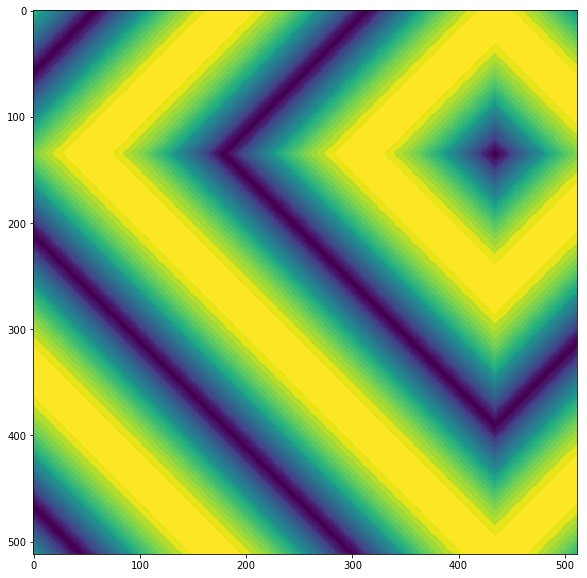

In [219]:
plt.figure(figsize = (10,10))
plt.imshow(bufR)